Error cargando usu_individual_T324.csv.xls: 'Ingreso total por provincia (en miles)'


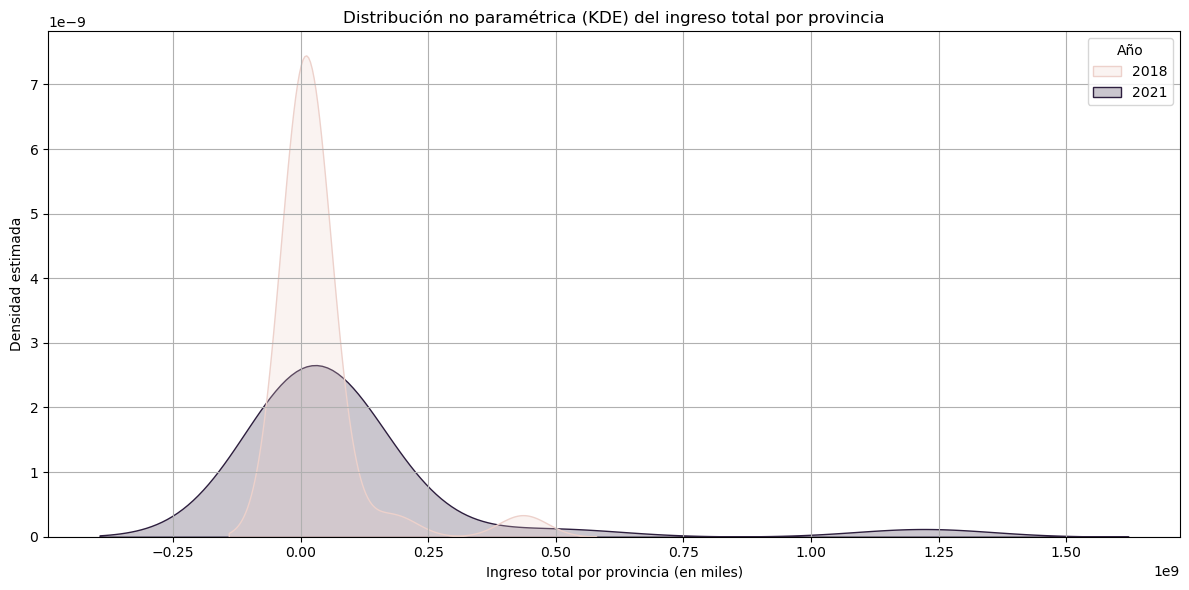

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def cargar_ingresos(path, año):
    try:
        # Ajustá skiprows si hay filas iniciales que no son datos
        df = pd.read_excel(path, skiprows=4)  
        df['Año'] = año
        # Selecciono solo la columna de interés y año
        ingresos = df["Ingreso total por provincia (en miles)"].dropna()
        return pd.DataFrame({'Ingreso': ingresos, 'Año': año})
    except Exception as e:
        print(f"Error cargando {path}: {e}")
        return pd.DataFrame()

# Carga datos de los tres años
df_2018 = cargar_ingresos('usu_individual_T318.csv.xls', 2018)
df_2021 = cargar_ingresos('usu_individual_T321.csv.xls', 2021)
df_2024 = cargar_ingresos('usu_individual_T324.csv.xls', 2024)

# Unir todos los años en un solo DataFrame
df_total = pd.concat([df_2018, df_2021, df_2024], ignore_index=True)

# Graficar KDE por año usando seaborn
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_total, x='Ingreso', hue='Año', fill=True, common_norm=False)
plt.title('Distribución no paramétrica (KDE) del ingreso total por provincia')
plt.xlabel('Ingreso total por provincia (en miles)')
plt.ylabel('Densidad estimada')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
import pandas as pd

# Leer el CSV que está dentro del zip
df = pd.read_csv('engho2018_gastos.zip.zip', compression='zip')

# Mostrar primeras filas
print(df.head())

# Mostrar columnas
print(df.columns)

  id|"provincia"|"miembro"|"pondera"|"region"|"subregion"|"articulo"|"subclase"|"clase"|"grupo"|"division"|"r_imputado"|"cantidad"|"unmed"|"monto"|"forma_pago"|"tipo_negocio"|"modo_adq"|"lugar_adq"
0  8558|14|0|749|2|"2A"|"A0111105"|"A01111"|"A011...                                                                                                                                                 
1  8558|14|0|749|2|"2A"|"A0111111"|"A01111"|"A011...                                                                                                                                                 
2  8558|14|0|749|2|"2A"|"A0111111"|"A01111"|"A011...                                                                                                                                                 
3  8558|14|0|749|2|"2A"|"A0111114"|"A01111"|"A011...                                                                                                                                                 
4  8558|14

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el CSV que está dentro del zip
df = pd.read_csv('engho2018_gastos.zip.zip', compression='zip')

df.columns = df.columns.str.strip()


# Paso 1: Calcular gasto total mensual por hogar
gasto_por_hogar = df.groupby("provincia")['GASTO_MENSUAL'].sum().reset_index()

# Paso 2: Calcular el logaritmo (para suavizar distribución)
gasto_por_hogar['log_gasto'] = gasto_por_hogar['GASTO_MENSUAL'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Eliminar posibles valores nulos tras el log
gasto_por_hogar = gasto_por_hogar.dropna(subset=['log_gasto'])

# Paso 3: Graficar KDE
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=gasto_por_hogar,
    x='log_gasto',
    bw_adjust=1.2,   # Ajusta suavizado
    fill=True       # Para que el área quede coloreada
)
plt.title('Distribución kernel del gasto mensual por hogar (log)')
plt.xlabel('Log del gasto mensual (en pesos)')
plt.ylabel('Densidad estimada')
plt.grid(True)
plt.show()


KeyError: 'modo_adq'

In [69]:
# Leer el CSV que está dentro del zip
df = pd.read_csv('engho2018_gastos.zip.zip', compression='zip')

print(df.columns)

Index(['id|"provincia"|"miembro"|"pondera"|"region"|"subregion"|"articulo"|"subclase"|"clase"|"grupo"|"division"|"r_imputado"|"cantidad"|"unmed"|"monto"|"forma_pago"|"tipo_negocio"|"modo_adq"|"lugar_adq"'], dtype='object')


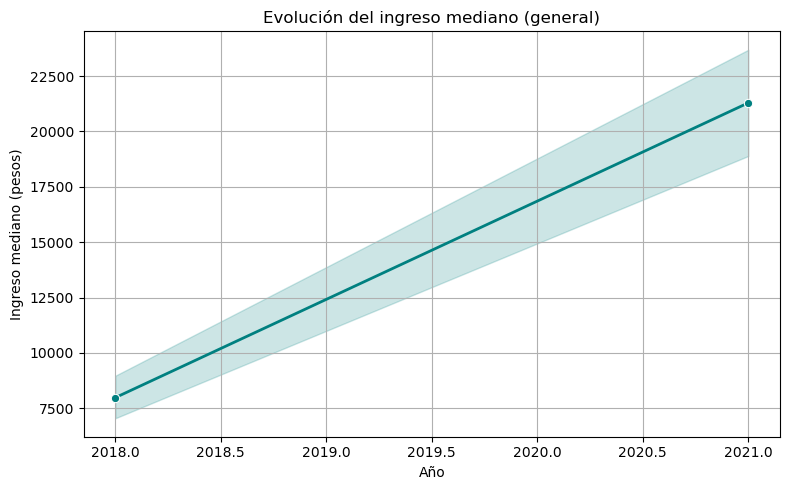

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

df_2018 = cargar_resumen('usu_individual_T318.csv.xls', 2018)
df_2021 = cargar_resumen('usu_individual_T321.csv.xls', 2021)

plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_total,
    x='Año',
    y='Mediana',
    marker='o',
    linewidth=2,
    color='teal'
)
plt.title('Evolución del ingreso mediano (general)')
plt.xlabel('Año')
plt.ylabel('Ingreso mediano (pesos)')
plt.grid(True)
plt.tight_layout()
plt.show()
